# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction:
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.
A number of
characteristics about the patient are
included in each row as below:

● ScheduledDay - Tells us on
what day the patient set up their
appointment.
● Neighborhood - Indicates the
location of the hospital.
● Scholarship - Indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● No-show - Be careful about the encoding
of the last column: it says ‘No’ if
the patient Show up to their
appointment, and ‘Yes’ if they
did not show up.


## Questions For Analysis:
#### 1. What proportion patients actually  appeared on their scheduled appointment day?
#### 2. Are Scholarship and SMS useful for  patients to show on the appointment day?
#### 3. Who is receiving more benefits in terms of  Scholarship and SMS either female or male ?
#### 4. On the appointment day, patients suffering from which disease appearing more in number?

In [1]:
# Import all packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

In [2]:
#Load dataset
df = pd.read_csv('noshowappointments.csv')

In [3]:
#Display the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Display all columns 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#No.of Rows and Columns
df.shape

(110527, 14)

In [6]:
# Get complete info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Note : ScheduledDay and AppointmentDay both are of object datatype that will be changed to datetime type in data cleaning part

In [7]:
#Get descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Check duplicate records
sum(df.duplicated())

0

#### Result: No duplicate records

In [9]:
#Check null values in the dataset  
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 #### Result - No null values in the dataset

### Data Cleaning 

In [10]:
#ScheduledDay and AppointmentDay both are of object datatype that will be changed to datetime type in data cleaning part
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [11]:
# Get complete info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Result:ScheduledDay and AppointmentDay now have datetime datatype

###  Rename Hipertension and Handcap to Hypertension and Handicap respectively. 


In [12]:
# Rename Hipertension and Handcap to Hypertension and Handicap respectively. 
df.rename(columns={'Hipertension': 'Hypertension','Handcap': 'Handicap'},inplace=True)

In [13]:
#No. of columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### Check incorrect age

In [14]:
# Check incorrect age 

(df['Age']<=0).value_counts()

False    106987
True       3540
Name: Age, dtype: int64

#### Result: Total 3540 incorrect dates that need to be dropped in order to make data consistent.

In [15]:
# Drop incorrect date

df.drop(df[df['Age']<=0].index,inplace=True,axis=0)

In [16]:
# Check incorrect age after drop
(df['Age']<=0).value_counts()

False    106987
Name: Age, dtype: int64

#### Result: No age less than and equal to 0.

### Changes in "No-show" Column:

#### 1. Change column name from 'No-show' to 'Show'.
#### 2. Change No with binary value 1 beacuse No means the patient Show up on their appointment day
#### 3. Change Yes with binary value 0 beacuse Yes which means they did not show up  on their appointment day.

### Change column name from 'No-show' to 'Show'.

In [17]:
#Rename the column
df.rename(columns={'No-show':'Show'},inplace=True)

In [18]:
#check columns names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Show'],
      dtype='object')

### Change  No with 1 and Yes with 0

In [19]:
#Change No with 1 & Yes with 0
df['Show'].replace({'No':1,'Yes':0},inplace=True)


In [20]:
#Display the dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


### Check & Delete Incorrect values in Handicap column

In [21]:
#Check Handicap column 
df['Handicap'].value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handicap, dtype: int64

#### Delete value >1 in Handicap column 


In [22]:
#Delete value >1 in Handicap column 
df.drop(df[df['Handicap']>1].index,inplace=True,axis=0)

In [23]:
#Check Handicap column after delete
df['Handicap'].value_counts()

0    104747
1      2041
Name: Handicap, dtype: int64

#### Result: Now only 0 & 1 values are there in Handicap columns

In [24]:
#Display the dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
# Exploratory Data Analysis

## 1. What proportion  patients actually  appeared on their scheduled appointment day?


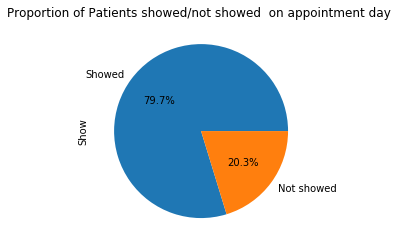

In [25]:
#Plot proportion patients showed or not
labels = ['Showed','Not showed']
df['Show'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=labels)
plt.title("Proportion of Patients showed/not showed  on appointment day ")
plt.show()

### Result : Pie chart clearly depicts that 79.7 % patients showed on the appointment day.


##  2. Are Scholarship and SMS useful for  patients to show on the appointment day?

###  Scholarship 

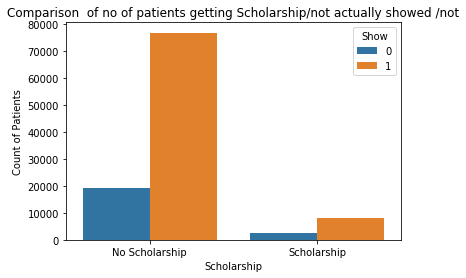

In [26]:
#plot NComparison  of no of patients getting Scholarship/not actually showed /not
comp = sns.countplot(x=df.Scholarship, hue = df.Show, data = df)
labels=['No Scholarship', 'Scholarship']
comp.set_xticklabels(labels)
plt.title("Comparison  of no of patients getting Scholarship/not actually showed /not")
plt.xlabel("Scholarship")
plt.ylabel("Count of Patients")
plt.show()

###  SMS

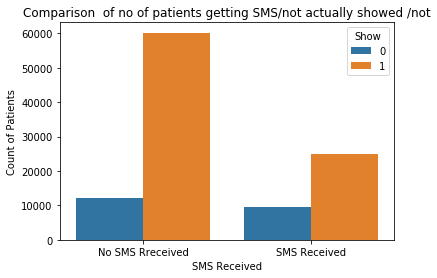

In [27]:
#plot Comparison  of no of patients getting SMS/not actually showed /not
graph = sns.countplot(x=df.SMS_received, hue = df.Show, data = df)
labels=['No SMS Rreceived', 'SMS Received']
graph.set_xticklabels(labels)
plt.title("Comparison  of no of patients getting SMS/not actually showed /not")
plt.xlabel("SMS Received")
plt.ylabel("Count of Patients")
plt.show()

### No, Scholarship and SMS are not useful for  patients to show on the appointment day as clearly depicts in the above two graphs of Scholarship and SMS.

## 3. Who is receiving more benefits in terms of  Scholarship and SMS either female or male ?

Thus Females patients are getting more Scholarship and SMS as compared to males

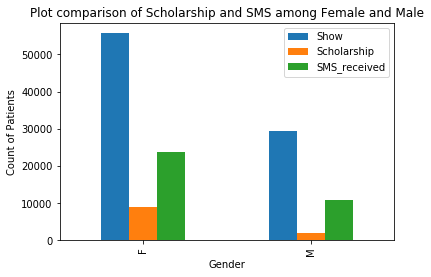

In [28]:
#Plot comparison of Scholarship and SMS among Female and Male
df.groupby(['Gender'])['Show','Scholarship','SMS_received'].sum().plot(kind='bar')
plt.title("Plot comparison of Scholarship and SMS among Female and Male")
plt.xlabel("Gender")
plt.ylabel("Count of Patients")
plt.show()

### Females are receiving more benefits in terms of  Scholarship and SMS because counts of patients is more on Female bar graph as clearly depicts from the graphs


## 4. On the appointment day, patients suffering from which disease appearing more in number?

In [30]:
#Number of Hypertension patients
hypertension =df.Hypertension.value_counts()[1]
hypertension

21716

In [31]:
#Number of Diabetes patients

diabetes =df.Diabetes.value_counts()[1]
diabetes

7900

In [32]:
#Number of Alcoholism patients

alcoholism =df.Alcoholism.value_counts()[1]
alcoholism

3352

In [33]:
#Number of Handicap patients

handicap =df.Handicap.value_counts()[1]
handicap

2041

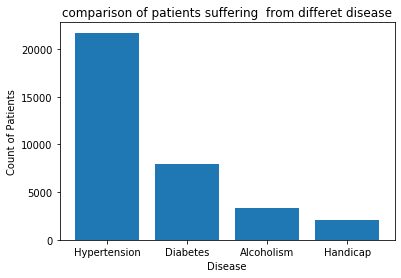

In [34]:
#plot comparison of patients suffering  from differet disease
plt.bar(['Hypertension','Diabetes','Alcoholism','Handicap'],[hypertension,diabetes,alcoholism,handicap])
plt.title("comparison of patients suffering  from differet disease")
plt.xlabel('Disease')
plt.ylabel('Count of Patients')
plt.show()

### Thus on the appointment day, patients suffering from Hypertension disease appearing more in number.

<a id='conclusions'></a>
## Conclusions


### 1. 79.7% patients showed on the appointment day.
### 2. Scholarship and SMS are not useful for  patients to show on the appointment day.
### 3. Females are receiving more benefits in terms of  Scholarship and SMS because counts of patients is more for Female
### 4. On the appointment day, patients suffering from Hypertension disease appearing more in number.
### 5. More Patients appearing on appointment day who are not suffering from any disease.